In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

<h1 style="font-size:10">1. Leer datos</h1>

Cargar datos: Glass

Atributos:
1. Número de identificación: 1 a 214
2. RI: índice de refracción
3. Na: Sodio (unidad de medida: porcentaje en peso en el óxido correspondiente, al igual que los atributos 4-10)
4. Mg: magnesio
5. Al: Aluminio
6. Si: silicio
7. K: Potasio
8. Ca: calcio
9. Ba: bario
10. Fe: Hierro
11. Tipo de vidrio: (atributo de clase)
     1. building_windows_float_processed
     2. building_windows_non_float_processed
     3. vehicle_windows_float_processed
     4. vehicle_windows_non_float_processed (ninguno en esta base de datos)
     5. contenedores
     6. vajilla
     7. faros
    
    
Distribución de clases: (de un total de 214 instancias)

1. 163 Vidrio de ventana (ventanas de edificios y ventanas de vehículos)
     1. 87 flotador procesado
         - 70 ventanas de construcción
         - 17 ventanas de vehículos
     2. 76 procesado sin flotación
         - 76 ventanas de construcción
         - 0 ventanas de vehículos
2. 51 Vidrio no de ventana
     - 13 contenedores
     - 9 vajillas
     - 29 faros

In [3]:
glass = pd.read_csv('glass.csv')
glass.columns = ['id','ri','na','mg','al','si','k','ca','ba','fe','class']
print("Glass shape: ", glass.shape)

Glass shape:  (213, 11)


Cargar datos: Titanic

In [73]:
train_titanic = pd.read_csv('titanic_train.csv', sep=',')
test_t = pd.read_csv('titanic_test.csv', sep=',')
gender_sub = pd.read_csv('gender_submission.csv', sep=',')
gender_sub.PassengerId = gender_sub.PassengerId.astype(float)

train_titanic = train_titanic.replace('Q', 0)
train_titanic = train_titanic.replace('S', 1)
train_titanic = train_titanic.replace('C', 2)
train_titanic = train_titanic.replace('male', 0)
train_titanic = train_titanic.replace('female', 1)
train_titanic = np.array(train_titanic.loc[:,['Sex','Age','Fare','Embarked', 'Survived']])
train_titanic = train_titanic[~np.isnan(train_titanic).any(axis=1)]

print("Titanic Train Shape : ", train_titanic.shape)

test1_t = pd.merge(test_t, gender_sub,  how='left', on='PassengerId')
test1_t = test1_t.replace('Q', 0)
test1_t = test1_t.replace('S', 1)
test1_t = test1_t.replace('C', 2)
test1_t = test1_t.replace('male', 0)
test1_t = test1_t.replace('female', 1)

print("Titanic Test Shape : ", train_titanic.shape)

test_titanic = np.array(test1_t.loc[:,['Sex','Age','Fare','Embarked', 'Survived']])
test_titanic = test_titanic[~np.isnan(test_titanic).any(axis=1)]

titanic = np.concatenate((train_titanic, test_titanic), axis=0)
titanic = pd.DataFrame(data=titanic, columns=['Sex','Age','Fare','Embarked', 'Survived'])

print("Titanic Shape: ", titanic.shape)
print(titanic.info())

Titanic Train Shape :  (712, 5)
Titanic Test Shape :  (712, 5)
Titanic Shape:  (1043, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       1043 non-null   float64
 1   Age       1043 non-null   float64
 2   Fare      1043 non-null   float64
 3   Embarked  1043 non-null   float64
 4   Survived  1043 non-null   float64
dtypes: float64(5)
memory usage: 40.9 KB
None


<h1 style="font-size:10">2. Normalizar datos</h1>

In [5]:
def Normalizar_Datos(data):
    print(data)
    tam = len(data.columns)
    y = data.iloc[:,-1]
    data = data.iloc[:,:-1]
    data = (data - data.mean(axis=0))/data.std(axis=0)
    data.insert(tam-1, "y", y, True) 
    return data

In [6]:
titanic_data = Normalizar_Datos(titanic)

      Sex   Age      Fare  Embarked  Survived
0     0.0  22.0    7.2500       1.0       0.0
1     1.0  38.0   71.2833       2.0       1.0
2     1.0  26.0    7.9250       1.0       1.0
3     1.0  35.0   53.1000       1.0       1.0
4     0.0  35.0    8.0500       1.0       0.0
...   ...   ...       ...       ...       ...
1038  1.0   3.0   13.7750       1.0       1.0
1039  1.0  37.0   90.0000       0.0       1.0
1040  1.0  28.0    7.7750       1.0       1.0
1041  1.0  39.0  108.9000       2.0       1.0
1042  0.0  38.5    7.2500       1.0       0.0

[1043 rows x 5 columns]


In [7]:
glass_data = Normalizar_Datos(glass)

      id       ri     na    mg    al     si     k    ca    ba    fe  class
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00      1
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00      1
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00      1
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00      1
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26      1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...   ...    ...
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00      7
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00      7
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00      7
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00      7
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00      7

[213 rows x 11 columns]


# 3. Kfolds

In [71]:
def kFolds(data, k=3, clases=[0, 1]):
    list_clases = []
    list_indices_break = []
    list_folds_clases = []

    #ordenar segun ultima columna
    data = data.sort_values(by=["y"]).values

    for i in range(1, len(clases)):
        #obtener el primer indice que sea igual a la clase actual
        indice_break = np.where(data[:,-1] == clases[i])[0][0]
        list_indices_break.append(indice_break)

    #dividir los datos en la cantidad de clases
    list_clases = np.split(data, list_indices_break)


    #dividir en k folds
    for clase in list_clases:
        clase = np.array_split(clase, k)
        list_folds_clases.append(clase)

    datos_split = list()

    #distribuir una porcion equitativa de cada clase a cada fold
    for i in range(k):
        fold = list_folds_clases[0][i]

        #combinar cada fold con una proporcion de cada clase
        for j in range(len(list_folds_clases)):
            fold = np.concatenate((fold, list_folds_clases[j][i]))

        #mezclar los dataFrames
        np.random.shuffle(fold)

        #separar x e y
        x_data = fold[:, :-1]
        y_data = fold[:, -1]

        datos_split.append([x_data, y_data])

    return datos_split

In [72]:
titanic_folds = kFolds(titanic_data, k=3, clases=[0,1])

In [ ]:
glass_folds = kFolds(glass_data, k=3, clases=[1,2,3,5,6,7])

# SVM

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

def linear_SVM(X_train, y_train, X_test, y_test, C=1):

    svc = svm.SVC(kernel='linear', C=C, gamma=0.001)
    svc.fit(X_train, y_train) 
    
    # Calcular el score del SVM
    score = svc.score(X_test, y_test)
    return score

def poly_SVM(X_train, y_train, X_test, y_test, C=1):

    svc = svm.SVC(kernel='poly', C=C, degree=3, gamma=0.001)
    svc.fit(X_train, y_train) 
    
    # Calcular el score del SVM
    score = svc.score(X_test, y_test)
    return score

def sigmoid_SVM(X_train, y_train, X_test, y_test, C=1):

    svc = svm.SVC(kernel='sigmoid', C=C, gamma=0.001)
    svc.fit(X_train, y_train) 
    
    # Calcular el score del SVM
    score = svc.score(X_test, y_test)
    return score

def kernel_gausiano_SVM(X_train, y_train, X_test, y_test, C=1):

    svc = svm.SVC(kernel='rbf', C=C, gamma=0.001)
    svc.fit(X_train, y_train) 
    
    # Calcular el score del SVM
    score = svc.score(X_test, y_test)
    return score

Score de linear SVM:
 0.9610244988864143
Score de polynomial SVM:
 0.9749443207126949
Score de sigmoid SVM:
 0.717706013363029
Score de kernel gausiano SVM:
 0.982739420935412


### Dataset titanic

Iterar variando los paramteros C

In [52]:
modelos_SVM = ["linear", "polynomial", "sigmoidal", "kernel gausiano"]
paramteros_C = [0.1, 0.25, 0.50, 0.75, 1.0, 1.5]
numFolds = 3
results_SVM_titanic = {}

matrix_ac = np.random.rand(len(modelos_SVM), len(paramteros_C), numFolds)

for j in range(len(paramteros_C)):
    c = paramteros_C[j]
    for i in range(numFolds):
        #actual fold (usado para test)
        fold = titanic_folds[i]
        test_fold_X = fold[0]
        test_fold_y = fold[1]

        #los otros dos folds usados para train
        fold_2 = titanic_folds[(i+1)%numFolds]
        fold_3 = titanic_folds[(i+2)%numFolds]
        train_fold_X = np.concatenate((fold_2[0], fold_3[0]), axis=0)
        train_fold_y = np.concatenate((fold_2[1], fold_3[1]), axis=0)

        #calcular score
        matrix_ac[0,j,i] = linear_SVM(X_train, y_train, X_test, y_test, C=c)
        matrix_ac[1,j,i] = poly_SVM(X_train, y_train, X_test, y_test, C=c)
        matrix_ac[2,j,i] = sigmoid_SVM(X_train, y_train, X_test, y_test, C=c)
        matrix_ac[3,j,i] = kernel_gausiano_SVM(X_train, y_train, X_test, y_test, C=c)

        #guardar datos
        results_SVM_titanic["linear_iter_"+str(c)+"_fold_"+str(i)] = matrix_ac[0,j,i]
        results_SVM_titanic["poly_iter_"+str(c)+"_fold_"+str(i)] = matrix_ac[1,j,i]
        results_SVM_titanic["sigmoid_"+str(c)+"_fold_"+str(i)] = matrix_ac[2,j,i]
        results_SVM_titanic["kernel_gausiano_iter_"+str(c)+"_fold_"+str(i)] = matrix_ac[3,j,i]

        #imprimir seguimiento
        print("c_"+str(c)+"_fold_"+str(i))
        
#calcular el promedio de los 3 folds
matrix_ac = np.mean(matrix_ac,axis=2)

c_0.1_fold_0
c_0.1_fold_1
c_0.1_fold_2
c_0.25_fold_0
c_0.25_fold_1
c_0.25_fold_2
c_0.5_fold_0
c_0.5_fold_1
c_0.5_fold_2
c_0.75_fold_0
c_0.75_fold_1
c_0.75_fold_2
c_1.0_fold_0
c_1.0_fold_1
c_1.0_fold_2
c_1.5_fold_0
c_1.5_fold_1
c_1.5_fold_2


Mostrar tabla de resultados

In [59]:
#obtener mejores parametros
parametros = (0,0)
for s in range(len(modelos_SVM)):
    for it in range(len(paramteros_C)):
        if(matrix_ac[s,it] > matrix_ac[parametros[0],parametros[1]]):
            parametros = (s, it)

#setear labels a columnas y filas
result_SVM_titanic = pd.DataFrame(data = matrix_ac, index= modelos_SVM, columns = paramteros_C)

#imprimir mejor acuracy
print("Mayor accuracy promedio con: " + str(modelos_SVM[parametros[0]]) + " empleando un C de " + str(paramteros_C[parametros[1]]))

#mostrar resultados empleando SVM en Titanic
result_SVM_titanic

Mayor accuracy promedio con: kernel gausiano empleando un C de 1.5


,0.10,0.25,0.50,0.75,1.00,1.50
linear,0.961581,0.961024,0.961024,0.961024,0.961024,0.961024
polynomial,0.974944,0.974388,0.974944,0.974944,0.974944,0.974944
sigmoidal,0.434855,0.693207,0.743318,0.739421,0.717706,0.650891
kernel gausiano,0.964365,0.971047,0.977728,0.981626,0.982739,0.984410


Plotear los resultados obtenidos

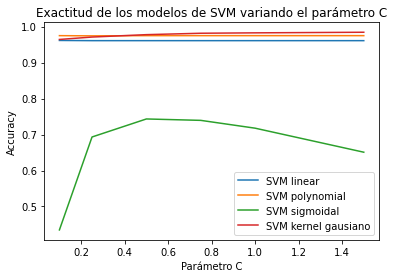

In [61]:
for s in range(len(result_SVM_titanic)):
    plt.plot(paramteros_C, result_SVM_titanic.iloc[s], label='SVM ' + modelos_SVM[s])
        
plt.title('Exactitud de los modelos de SVM variando el parámetro C')
plt.xlabel('Parámetro C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Dataset glass

Iterar variando los paramteros C

In [63]:
modelos_SVM = ["linear", "polynomial", "sigmoidal", "kernel gausiano"]
paramteros_C = [0.1, 0.25, 0.50, 0.75, 1.0, 1.5]
numFolds = 3
results_SVM_titanic = {}

matrix_ac_glass = np.random.rand(len(modelos_SVM), len(paramteros_C), numFolds)

for j in range(len(paramteros_C)):
    c = paramteros_C[j]
    for i in range(numFolds):
        #actual fold (usado para test)
        fold = glass_folds[i]
        test_fold_X = fold[0]
        test_fold_y = fold[1]

        #los otros dos folds usados para train
        fold_2 = glass_folds[(i+1)%numFolds]
        fold_3 = glass_folds[(i+2)%numFolds]
        train_fold_X = np.concatenate((fold_2[0], fold_3[0]), axis=0)
        train_fold_y = np.concatenate((fold_2[1], fold_3[1]), axis=0)

        #calcular score
        matrix_ac_glass[0,j,i] = linear_SVM(X_train, y_train, X_test, y_test, C=c)
        matrix_ac_glass[1,j,i] = poly_SVM(X_train, y_train, X_test, y_test, C=c)
        matrix_ac_glass[2,j,i] = sigmoid_SVM(X_train, y_train, X_test, y_test, C=c)
        matrix_ac_glass[3,j,i] = kernel_gausiano_SVM(X_train, y_train, X_test, y_test, C=c)

        #imprimir seguimiento
        print("c_"+str(c)+"_fold_"+str(i))
        
#calcular el promedio de los 3 folds
matrix_ac_glass = np.mean(matrix_ac,axis=2)

c_0.1_fold_0
c_0.1_fold_1
c_0.1_fold_2
c_0.25_fold_0
c_0.25_fold_1
c_0.25_fold_2
c_0.5_fold_0
c_0.5_fold_1
c_0.5_fold_2
c_0.75_fold_0
c_0.75_fold_1
c_0.75_fold_2
c_1.0_fold_0
c_1.0_fold_1
c_1.0_fold_2
c_1.5_fold_0
c_1.5_fold_1
c_1.5_fold_2


Mostrar tabla de resultados

In [64]:
#obtener mejores parametros
parametros = (0,0)
for s in range(len(modelos_SVM)):
    for it in range(len(paramteros_C)):
        if(matrix_ac_glass[s,it] > matrix_ac_glass[parametros[0],parametros[1]]):
            parametros = (s, it)

#setear labels a columnas y filas
result_SVM_glass = pd.DataFrame(data = matrix_ac_glass, index= modelos_SVM, columns = paramteros_C)

#imprimir mejor acuracy
print("Mayor accuracy promedio con: " + str(modelos_SVM[parametros[0]]) + " empleando un C de " + str(paramteros_C[parametros[1]]))

#mostrar resultados empleando SVM en Titanic
result_SVM_glass

Mayor accuracy promedio con: polynomial empleando un C de 1.0


,0.10,0.25,0.50,0.75,1.00,1.50
linear,0.511074,0.416970,0.485961,0.180101,0.410306,0.413148
polynomial,0.291010,0.512755,0.213885,0.743295,0.758899,0.608562
sigmoidal,0.541727,0.113591,0.674038,0.625097,0.170028,0.546843
kernel gausiano,0.378412,0.410005,0.425699,0.330558,0.534553,0.635492


Plotear los resultados obtenidos

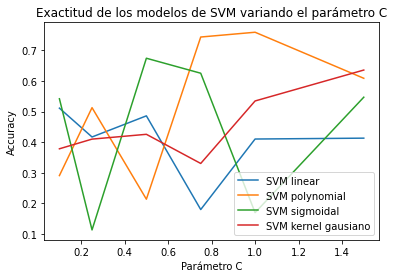

In [66]:
for s in range(len(result_SVM_glass)):
    plt.plot(paramteros_C, result_SVM_glass.iloc[s], label='SVM ' + modelos_SVM[s])
        
plt.title('Exactitud de los modelos de SVM variando el parámetro C')
plt.xlabel('Parámetro C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()